
<h1>Research phase<h1>

In [1]:
# importing libs
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from statsmodels.tsa.stattools import coint
import plotly.graph_objects as go

In [2]:
# List of asset candidates
assets = ["SPY", "QQQ", "XLK", "VGT", "IVV"]

In [3]:
# Download historical price data
start_date = "2020-01-01"
# Creating today date variable
end_date = str(datetime.today().date())

In [4]:
# Downlaod our data
data = yf.download(tickers=assets, start=start_date, end=end_date, interval="1d")['Close'].dropna()
# Reset the index
data.reset_index(inplace=True)
# Extracting date form date time  
data["Date"] = data["Date"].apply(lambda x : x.date())
# setting Date column as our index and dropping the old one
data  = data.reset_index(drop=True).set_index("Date")
# show up the resualt
data.head()

[*********************100%***********************]  5 of 5 completed


Ticker,IVV,QQQ,SPY,VGT,XLK
Date,,,,,
2020-01-02,326.320007,216.160004,324.869995,249.339996,93.389999
2020-01-03,323.809998,214.179993,322.410004,246.720001,92.339996
2020-01-06,325.089996,215.559998,323.640015,247.539993,92.559998
2020-01-07,324.200012,215.529999,322.730011,247.509995,92.519997
2020-01-08,325.850006,217.149994,324.450012,250.119995,93.510002


In [5]:
# Studying correlation matrix
corr_matrix = data.corr()
corr_matrix

Ticker,IVV,QQQ,SPY,VGT,XLK
Ticker,,,,,
IVV,1.000000,0.977887,0.999980,0.984819,0.978188
QQQ,0.977887,1.000000,0.978017,0.994889,0.984167
SPY,0.999980,0.978017,1.000000,0.984833,0.978050
VGT,0.984819,0.994889,0.984833,1.000000,0.994947
XLK,0.978188,0.984167,0.978050,0.994947,1.000000


In [6]:
# Looking for the strongest correlation between assets
strong_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1)]
strong_corr

Ticker,IVV,QQQ,SPY,VGT,XLK
Ticker,,,,,
IVV,NaN,0.977887,0.999980,0.984819,0.978188
QQQ,0.977887,NaN,0.978017,0.994889,0.984167
SPY,0.999980,0.978017,NaN,0.984833,0.978050
VGT,0.984819,0.994889,0.984833,NaN,0.994947
XLK,0.978188,0.984167,0.978050,0.994947,NaN


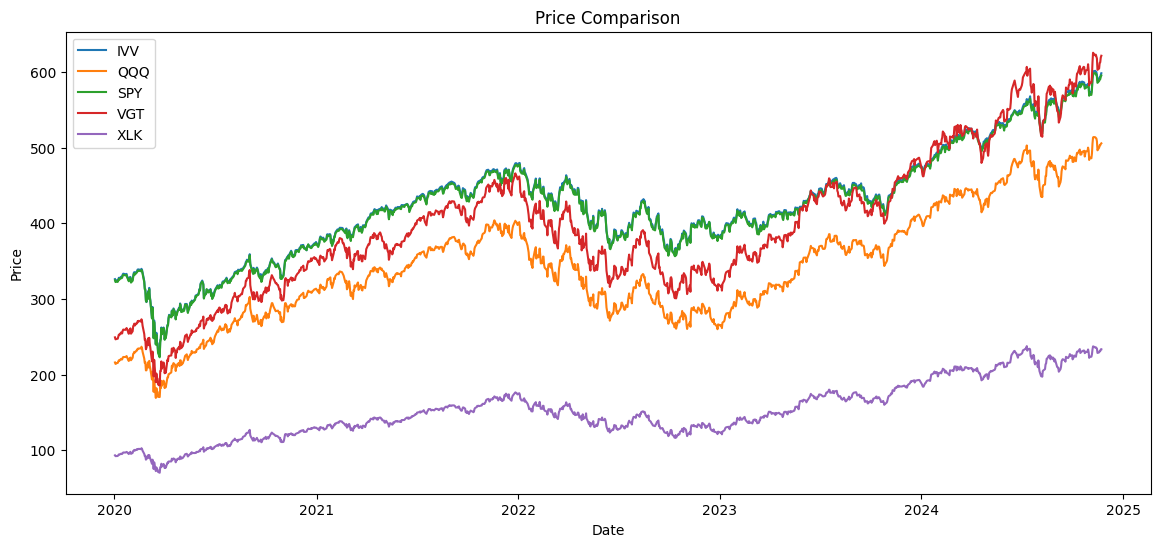

In [7]:
# plotting Price over time to make a comparison
plt.figure(figsize=(14, 6))
for i in data.columns:
    plt.plot(data[i], label=str(i))
plt.title('Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [8]:
# Initialize an empty DataFrame to store spreads
spread_df = pd.DataFrame(index=data.index)

# Loop through each pair of assets and calculate the spread
for i in range(len(assets)):
    for j in range(i+1, len(assets)): 
        asset1 = assets[i]
        asset2 = assets[j]
        
        # Calculate the spread (difference between the two assets)
        spread_label = f"{asset1}_{asset2}"
        spread_df[spread_label] = data[asset1] - data[asset2]

# Display the first few rows of the calculated spreads
spread_df

,SPY_QQQ,SPY_XLK,SPY_VGT,SPY_IVV,QQQ_XLK,QQQ_VGT,QQQ_IVV,XLK_VGT,XLK_IVV,VGT_IVV
Date,,,,,,,,,,
2020-01-02,108.709991,231.479996,75.529999,-1.450012,122.770004,-33.179993,-110.160004,-155.949997,-232.930008,-76.980011
2020-01-03,108.230011,230.070007,75.690002,-1.399994,121.839996,-32.540009,-109.630005,-154.380005,-231.470001,-77.089996
2020-01-06,108.080017,231.080017,76.100021,-1.449982,123.000000,-31.979996,-109.529999,-154.979996,-232.529999,-77.550003
2020-01-07,107.200012,230.210014,75.220016,-1.470001,123.010002,-31.979996,-108.670013,-154.989998,-231.680016,-76.690018
2020-01-08,107.300018,230.940010,74.330017,-1.399994,123.639992,-32.970001,-108.700012,-156.609993,-232.340004,-75.730011
...,...,...,...,...,...,...,...,...,...,...
2024-11-18,88.130035,358.700027,-16.569946,-2.959961,270.569992,-104.699982,-91.089996,-375.269974,-361.659988,13.609985
2024-11-19,86.839996,358.969986,-21.869995,-2.869995,272.129990,-108.709991,-89.709991,-380.839981,-361.839981,19.000000
2024-11-20,87.329987,359.369995,-22.320007,-2.940002,272.040009,-109.649994,-90.269989,-381.690002,-362.309998,19.380005


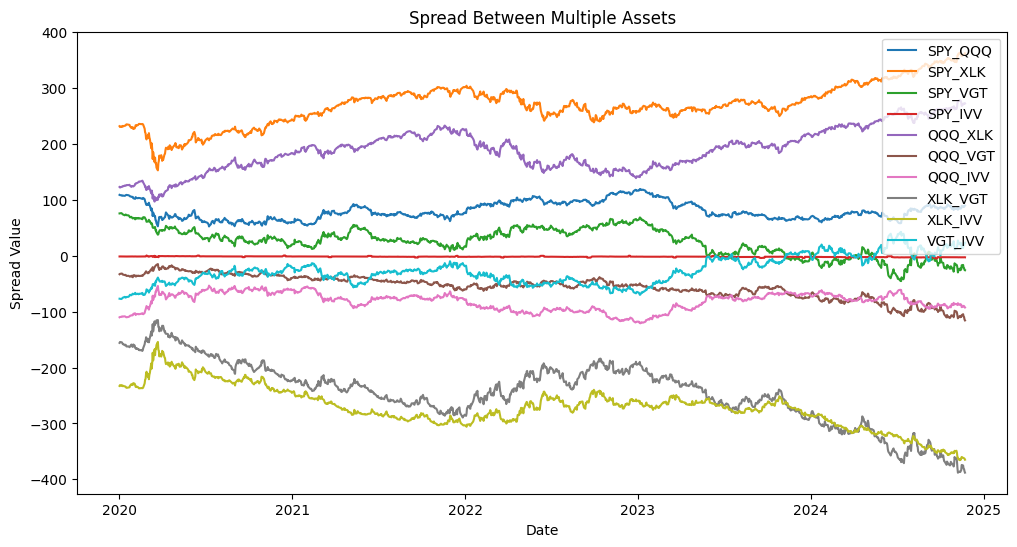

In [9]:
# Plot the spreads
plt.figure(figsize=(12, 6))
for column in spread_df.columns:
    plt.plot(spread_df[column], label=column)

plt.title('Spread Between Multiple Assets')
plt.xlabel('Date')
plt.ylabel('Spread Value')
plt.legend()
plt.show()

In [10]:
# Initialize an empty dictionary, so we can store each assets with p-value
pvalue = dict()
# Looping throw corrlated assets and caluclationg the p-value for each
for i in range(len(assets)):
    for j in range(i+1, len(assets)):
        score, p_value, _ = coint(data[assets[i]], data[assets[j]])
        print(f"Cointegration Test p-value for {assets[i]} and {assets[j]}: {p_value}")
        pvalue.update({f"{assets[i]} and {assets[j]}": p_value})


Cointegration Test p-value for SPY and QQQ: 0.3155661765430872
Cointegration Test p-value for SPY and XLK: 0.25960481938442675
Cointegration Test p-value for SPY and VGT: 0.08336141312415557
Cointegration Test p-value for SPY and IVV: 5.806752345023216e-10
Cointegration Test p-value for QQQ and XLK: 0.7004737757609873
Cointegration Test p-value for QQQ and VGT: 0.368603499414228
Cointegration Test p-value for QQQ and IVV: 0.23714145065723224
Cointegration Test p-value for XLK and VGT: 0.9739081572857883
Cointegration Test p-value for XLK and IVV: 0.21253649456122092
Cointegration Test p-value for VGT and IVV: 0.06911395483017198


In [11]:
# Looping throw the p-values dict, so we can find out the co-integrated assets, with p-value < 0.05 
for i in pvalue.values():
    if i < 0.05:
        key = next((k for k, v in pvalue.items() if v == i), None)
        print(f"Spread trading opportunity: {key} thier p-value: {i} < 0.05")

Spread trading opportunity: SPY and IVV thier p-value: 5.806752345023216e-10 < 0.05


<h1>Application & Backtesting phase<h1>

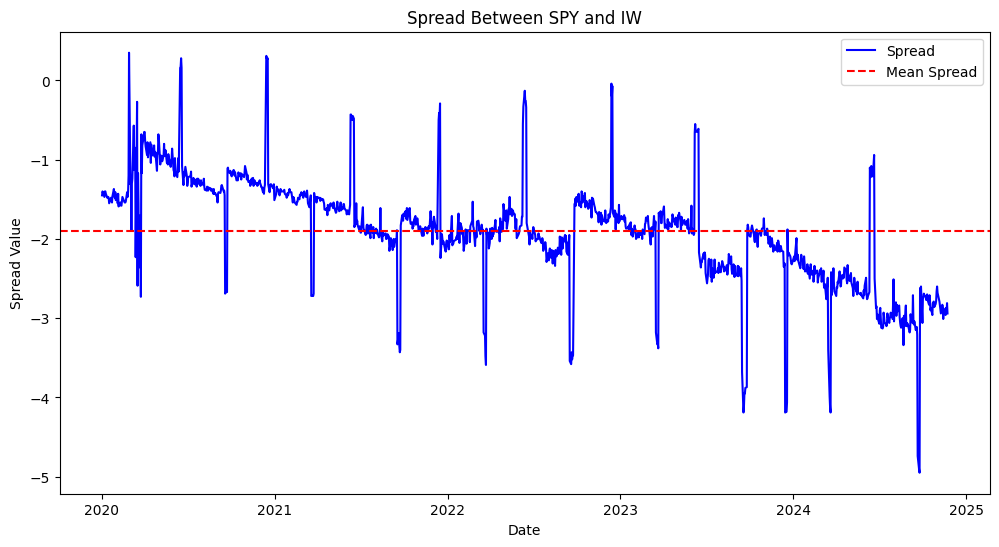

In [12]:
# Creating new dataframe with the spread of correlated assets
spread_data = spread_df['SPY_IVV'].to_frame("Spread")
# Plot the speard and the mean 
plt.figure(figsize=(12, 6))
plt.plot(spread_data['Spread'], label='Spread', color='blue')
plt.axhline(spread_data['Spread'].mean(), color='red', linestyle='--', label='Mean Spread')
plt.title('Spread Between SPY and IW')
plt.xlabel('Date')
plt.ylabel('Spread Value')
plt.legend()
plt.show()

In [13]:
# Calculate mean and standard deviation
mean_spread = spread_df['SPY_IVV'].mean()
std_spread = spread_df['SPY_IVV'].std()

# Calculate upper and lower bounds
spread_data['Upper Bound'] = mean_spread + std_spread
spread_data['Lower Bound'] = mean_spread - std_spread


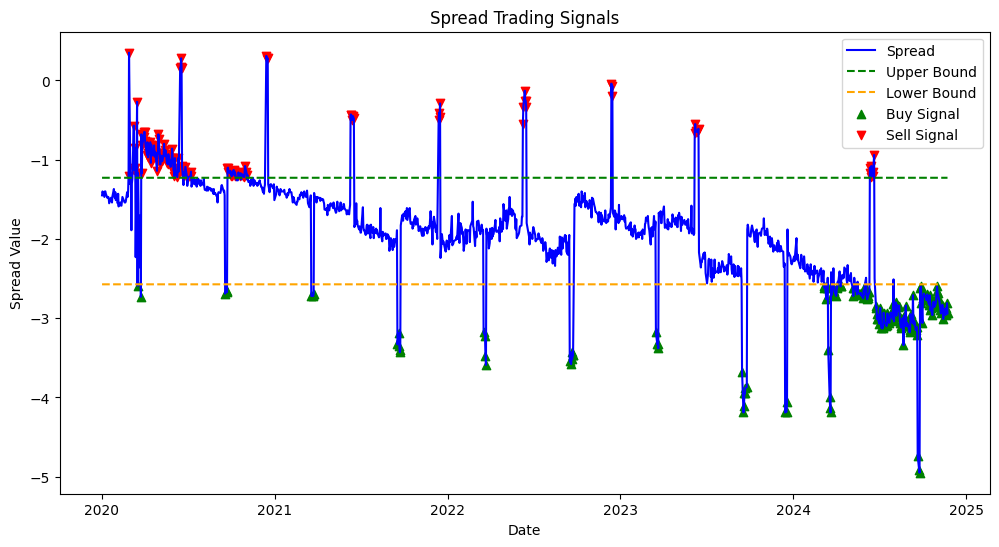

In [14]:
# Create our signals
spread_data['Signal'] = 0
# Short opportunity
spread_data.loc[spread_data['Spread'] > spread_data['Upper Bound'], 'Signal'] = -1
# Long portunity 
spread_data.loc[spread_data['Spread'] < spread_data['Lower Bound'], 'Signal'] = 1  

# Visualize signals on the spread
plt.figure(figsize=(12, 6))
plt.plot(spread_data['Spread'], label='Spread', color='blue')
plt.plot(spread_data['Upper Bound'], label='Upper Bound', color='green', linestyle='--')
plt.plot(spread_data['Lower Bound'], label='Lower Bound', color='orange', linestyle='--')
plt.scatter(spread_data['Spread'][spread_data['Signal']== 1].index, spread_data['Spread'][spread_data['Signal'] == 1], color='green', label='Buy Signal', marker='^')
plt.scatter(spread_data['Spread'][spread_data['Signal']== -1].index, spread_data['Spread'][spread_data['Signal'] == -1], color='red', label='Sell Signal', marker='v')
plt.title('Spread Trading Signals')
plt.xlabel('Date')
plt.ylabel('Spread Value')
plt.legend()
plt.show()


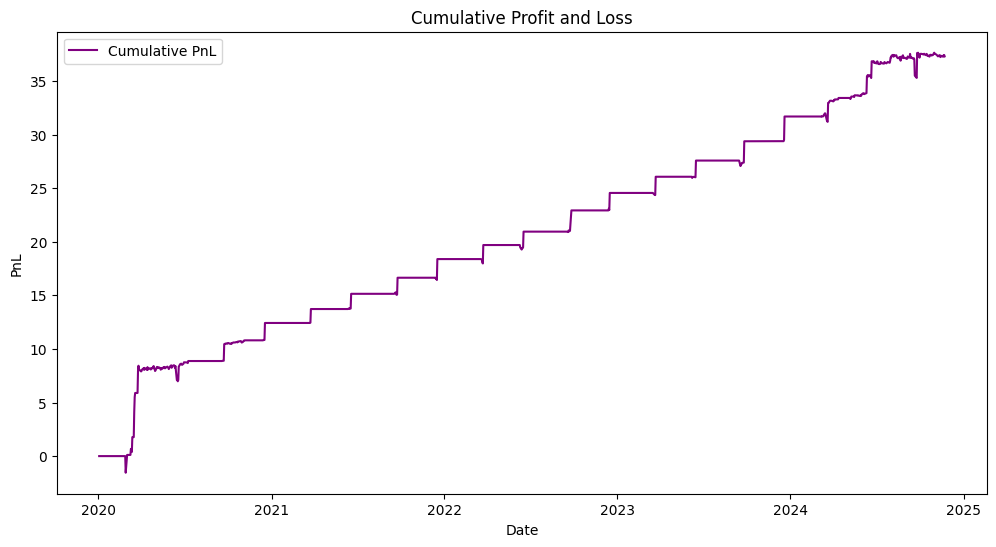

In [15]:
# Backtesting
spread_data['PnL'] = spread_data['Signal'].shift(1) * (spread_data['Spread'].diff())
spread_data['Cumulative PnL'] = spread_data['PnL'].cumsum()

# Plot cumulative profit and loss
plt.figure(figsize=(12, 6))
plt.plot(spread_data['Cumulative PnL'], label='Cumulative PnL', color='purple')
plt.title('Cumulative Profit and Loss')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.legend()
plt.show()

In [16]:
# Calculate sharpe ratio 
sharpe_ratio = spread_data['PnL'].mean() / spread_data['PnL'].std() * (252**0.5)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 1.86


In [17]:
# Create new portfolio df for backtesting 
portfolio = pd.DataFrame(index=data.index)
# Calculate the opposite positions for each asset
# If SPY long IVV short and vice versa
portfolio['SPY_Position'] = spread_data['Signal'] 
portfolio['IVV_Position'] = spread_data['Signal'] * -1

# Calculate the returns for each asset 
portfolio['SPY_Return'] = data['SPY'].pct_change() * portfolio['SPY_Position'].shift(1)
portfolio['IVV_Return'] = data['IVV'].pct_change() * portfolio['IVV_Position'].shift(1)
# Total Reurn 
portfolio['Total_Return'] = portfolio['SPY_Return'] + portfolio['IVV_Return']
# Cumulative return 
portfolio['Cumulative_Return'] = portfolio['Total_Return'].cumsum()
portfolio.dropna(inplace=True)

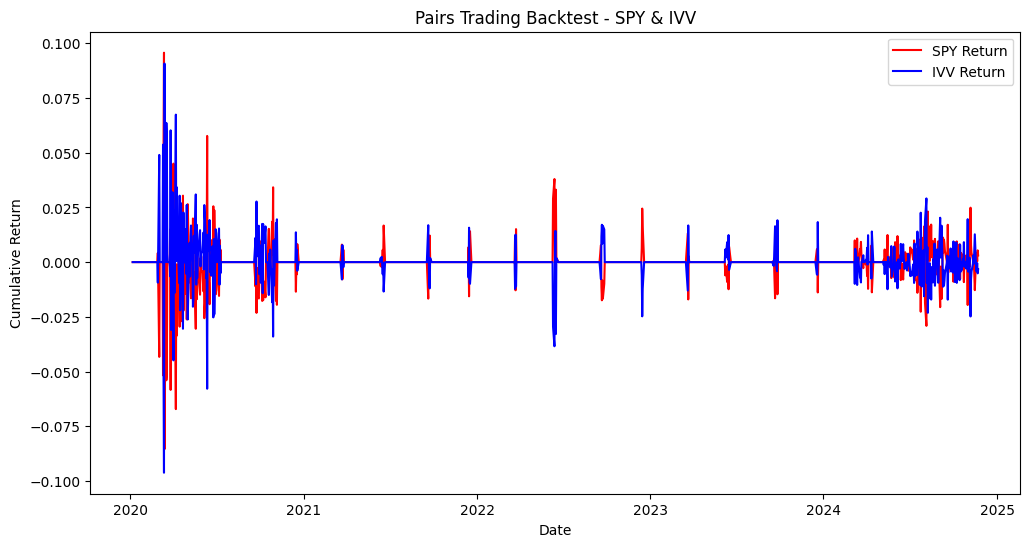

In [18]:
# Plot the resualt of our backtest
plt.figure(figsize=(12, 6))
plt.plot(data['SPY'].pct_change() * portfolio['SPY_Position'].shift(1), label="SPY Return", color='Red')
plt.plot(data['IVV'].pct_change() * portfolio['IVV_Position'].shift(1), label="IVV Return", color='Blue')
plt.title("Pairs Trading Backtest - SPY & IVV")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

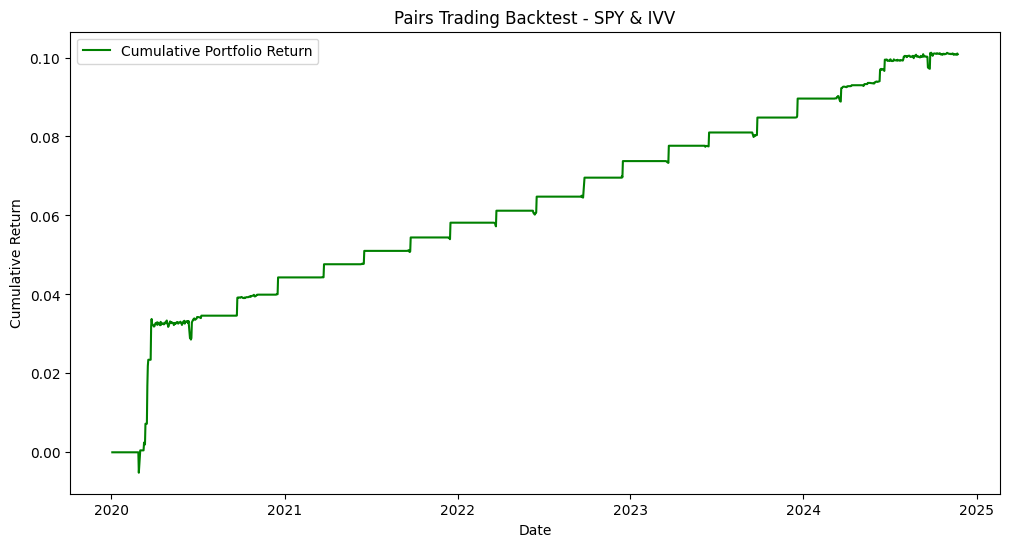

In [19]:
# Plot the resualt of our backtest
plt.figure(figsize=(12, 6))
plt.plot(portfolio['Cumulative_Return'], label="Cumulative Portfolio Return", color='Green')
plt.title("Pairs Trading Backtest - SPY & IVV")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

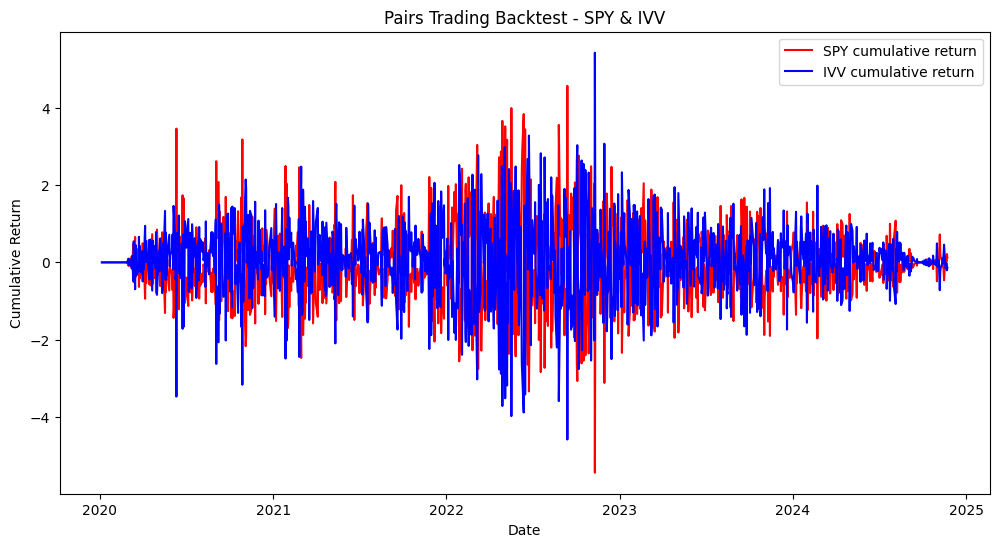

In [20]:
# Plot the resualt of our cumulative return for each asset 
plt.figure(figsize=(12, 6))
plt.plot(data['SPY'].pct_change() * portfolio['SPY_Position'].shift(1).cumsum(), label="SPY cumulative return", color='Red')
plt.plot(data['IVV'].pct_change() * portfolio['IVV_Position'].shift(1).cumsum(), label="IVV cumulative return", color='Blue')
plt.title("Pairs Trading Backtest - SPY & IVV")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

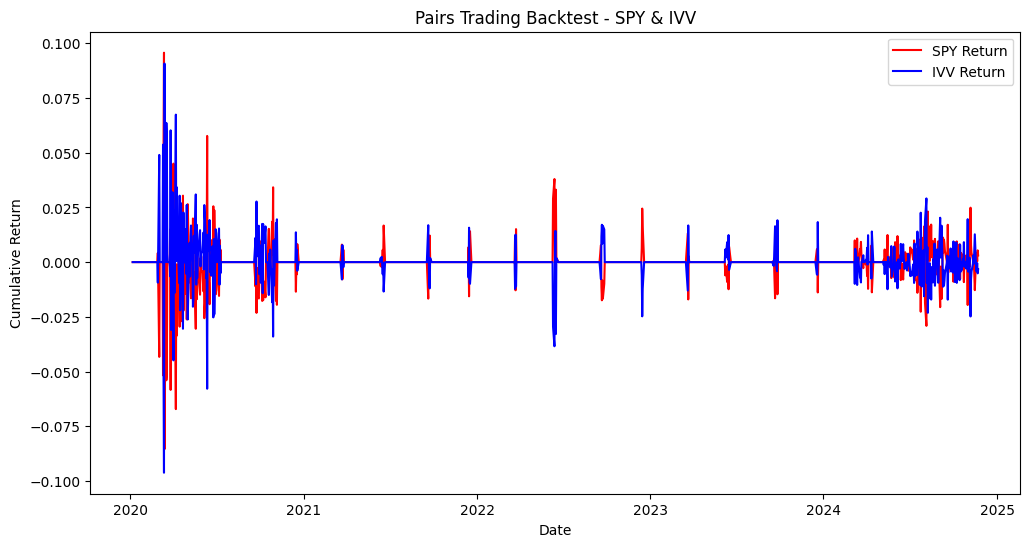

In [21]:
# Plot the resualt of our return for each asset 
plt.figure(figsize=(12, 6))
plt.plot(data['SPY'].pct_change() * portfolio['SPY_Position'].shift(1), label="SPY Return", color='Red')
plt.plot(data['IVV'].pct_change() * portfolio['IVV_Position'].shift(1), label="IVV Return", color='Blue')
plt.title("Pairs Trading Backtest - SPY & IVV")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

In [22]:
# Preparing data for plotting
x = portfolio.index
SPY_CumReturn = data['SPY'].pct_change() * portfolio['SPY_Position'].shift(1).cumsum()
IVV_CumReturn = data['IVV'].pct_change() * portfolio['IVV_Position'].shift(1).cumsum()
SPY_Return = data['SPY'].pct_change() * portfolio['SPY_Position'].shift(1)
IVV_Return = data['IVV'].pct_change() * portfolio['IVV_Position'].shift(1)

# Create a figure
fig = go.Figure()

# Create traces
fig.add_traces([
    go.Scatter(x=x, y=portfolio['Cumulative_Return'], mode='lines', name='Total cumulative return', line=dict(color='Green')),
    go.Scatter(x=x, y=SPY_CumReturn, mode='lines', name='SPY cumulative return', line=dict(color='Blue')),
    go.Scatter(x=x, y=IVV_CumReturn, mode='lines', name='IVV cumulative return', line=dict(color='Red')),
    go.Scatter(x=x, y=SPY_Return, mode='lines+markers', name='SPY return', line=dict(color='Blue')),
    go.Scatter(x=x, y=IVV_Return, mode='lines+markers', name='IVV return', line=dict(color='Red'))
])

# Update layout
fig.update_layout(
    title="Pairs Trading Backtest - Interactive Plot",
    xaxis_title="Date",
    yaxis_title="Cumulative Return",
    hovermode="x unified",
    template="plotly_dark",
    width=1000,
    height=600,
)

# Show the plot
fig.show()
